# Importing Python libraries

In [286]:
import pandas as pd
import numpy as np
import os
import requests
import json
import matplotlib.pyplot as plt
import seaborn as sns
import tweepy
from IPython.display import Image
%matplotlib inline

# Gathering Data

###### - twitter-archive-enhanced CSV file

In [287]:
# Reading twitter-archive file into dataframe
archive_df = pd.read_csv('twitter-archive-enhanced-2.csv', encoding = 'utf-8')

In [288]:
# testing dataframe readability
archive_df.head(2)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   

   rating_denominator     name doggo floofer pupper puppo  
0                  10  Phineas  None    None   None  None  
1                  10    Tilly  None    None   None  None

###### - image prediction data

In [289]:
# downloading image prediction data
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [290]:
# saving image prediction data into file
file_name = url.split('/')[-1]
if not os.path.isfile(file_name):
    with open(file_name,'wb') as file:
        file.write(response.content)

In [291]:
# Reading image prediction data into dataframe
predictions_df = pd.read_csv(file_name, sep = '\t', encoding='utf-8')

In [292]:
# testing dataframe readability
predictions_df.head(3)

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True

###### - twitter API data

In [644]:
# Authentication tweepy and creating twitter API
consumer_key = '**************************'
consumer_secret = '**************************'
access_token = '**************************'
access_secret = '**************************'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [147]:
# Creating tweet_json file if not exist
errors = []
if not os.path.isfile('tweet_json.txt'):
    with open ('tweet-json.txt', 'wb') as file:
        for tweet_id in archive_df['tweet_id']:
            # filling file with tweets status line by line
            try:
                status = twitter_api.get_status(tweet_id, wait_on_rate_limit=True,  wait_on_rate_limit_notify=True, tweet_mode = 'extended')
                tweet = json.dumps(status._json).strip() + '\n'
                file.write(tweet.encode('utf-8'))
            # if there is an error while getting a tweet, record it's id and continue
            except Exception as e:
                print("Error on tweet id {}".format(tweet_id) + ";" + str(e))
                errors.append(tweet_id)

In [293]:
# extract some useful data columns from tweet-json.txt into dataframe
df_list = []

with open('tweet-json.txt', 'r') as api_file:
    for line in api_file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        fav_count = tweet['favorite_count']
        df_list.append({'tweet_id':tweet_id,
                       'retweet_count': retweet_count,
                       'favorite_count': fav_count})
api_df = pd.DataFrame(df_list)


In [294]:
# testing dataframe readability
api_df.head(3)

tweet_id  retweet_count  favorite_count
0  892420643555336193           8853           39467
1  892177421306343426           6514           33819
2  891815181378084864           4328           25461

# Assessing Data
### 1- Visual assessment:

###### - twitter-archive-enhanced file
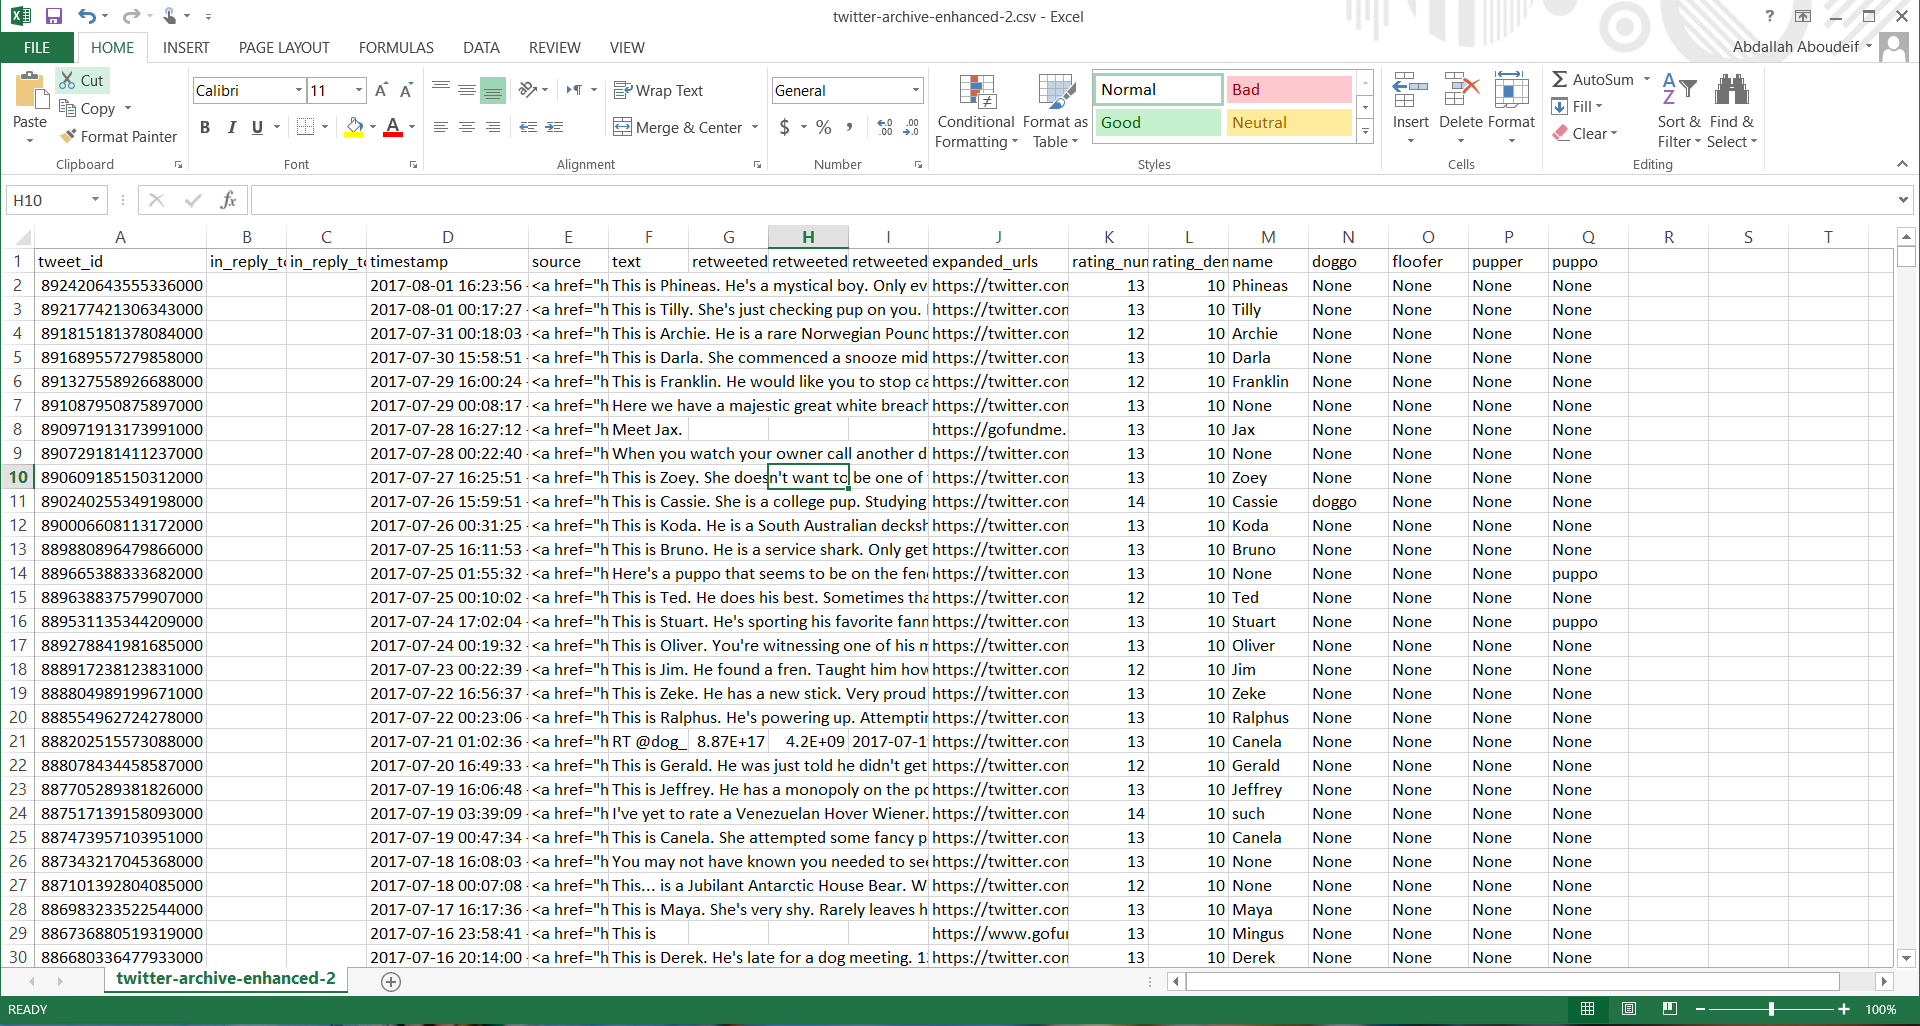


In [295]:
archive_df.sample(5)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
1516  690959652130045952                    NaN                  NaN   
781   775729183532220416                    NaN                  NaN   
2208  668625577880875008                    NaN                  NaN   
2048  671511350426865664                    NaN                  NaN   
1747  679111216690831360                    NaN                  NaN   

                      timestamp  \
1516  2016-01-23 18:09:53 +0000   
781   2016-09-13 16:13:44 +0000   
2208  2015-11-23 03:02:14 +0000   
2048  2015-12-01 02:09:16 +0000   
1747  2015-12-22 01:28:25 +0000   

                                                 source  \
1516  <a href="http://twitter.com/download/iphone" r...   
781   <a href="http://twitter.com/download/iphone" r...   
2208  <a href="http://twitter.com/download/iphone" r...   
2048  <a href="http://twitter.com/download/iphone" r...   
1747  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
1516  This golden is happy to refute the soft mouth ...                  NaN   
781   This girl straight up rejected a guy because h...                  NaN   
2208  This is Maks. Maks just noticed something wasn...                  NaN   
2048  Say hello to Hammond. He's just a wee lil pup....                  NaN   
1747  This is officially the greatest yawn of all ti...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
1516                       NaN                        NaN   
781                        NaN                        NaN   
2208                       NaN                        NaN   
2048                       NaN                        NaN   
1747                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
1516  https://twitter.com/dog_rates/status/690959652...                11   
781   https://twitter.com/dog_rates/status/775729183...                13   
2208  https://twitter.com/dog_rates/status/668625577...                10   
2048  https://twitter.com/dog_rates/status/671511350...                 8   
1747  https://twitter.com/dog_rates/status/679111216...                12   

      rating_denominator        name doggo floofer pupper puppo  
1516                  10        None  None    None   None  None  
781                   10        None  None    None   None  None  
2208                  10        Maks  None    None   None  None  
2048                  10     Hammond  None    None   None  None  
1747                  10  officially  None    None   None  None

###### - image-predictions file
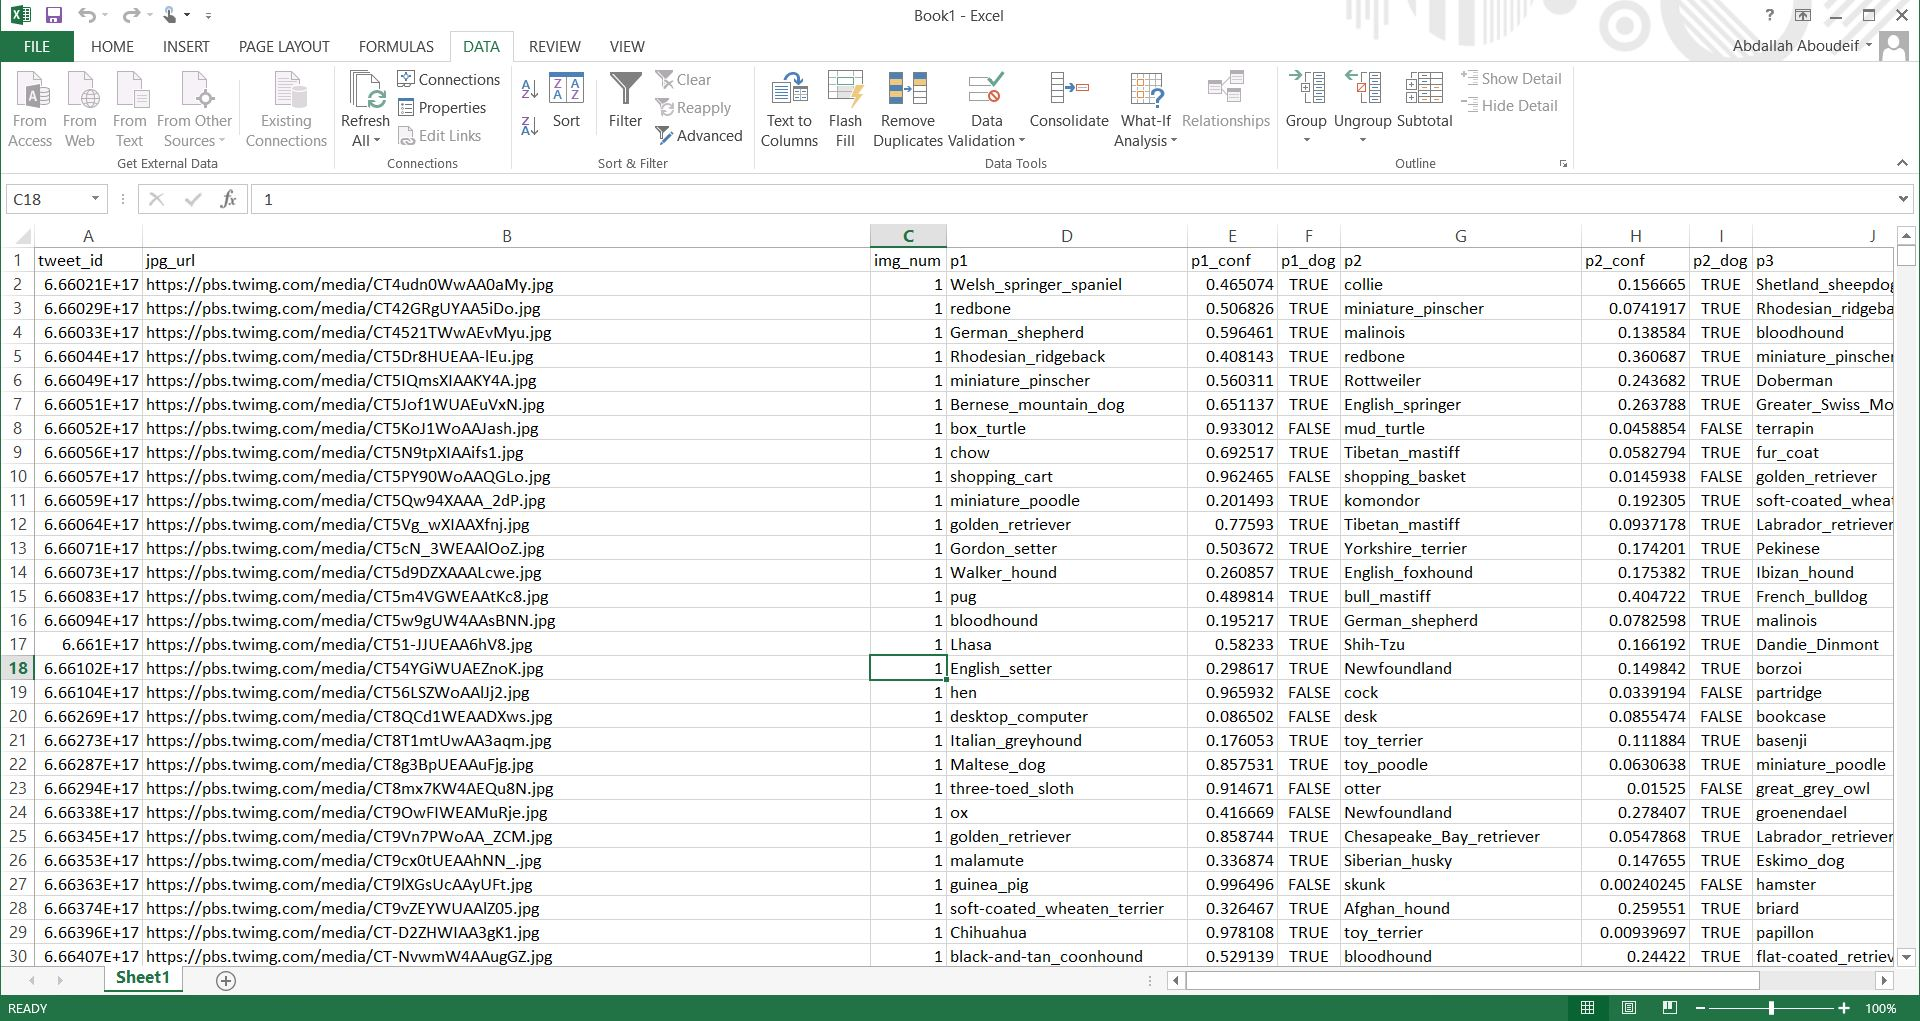

In [296]:
predictions_df.sample(5)

tweet_id                                          jpg_url  \
1748  823581115634085888  https://pbs.twimg.com/media/C23ypm6VQAAO31l.jpg   
343   672264251789176834  https://pbs.twimg.com/media/CVRcxJ-WsAAXOhO.jpg   
1790  830097400375152640  https://pbs.twimg.com/media/C4UZLZLWYAA0dcs.jpg   
157   668852170888998912  https://pbs.twimg.com/media/CUg9gBvWoAAmx-2.jpg   
1606  800459316964663297  https://pbs.twimg.com/media/CxvNfrhWQAA2hKM.jpg   

      img_num                p1   p1_conf  p1_dog               p2   p2_conf  \
1748        1             dingo  0.280949   False  German_shepherd  0.194044   
343         1         Chihuahua  0.609860    True            teddy  0.068134   
1790        4        toy_poodle  0.442713    True       Pomeranian  0.142073   
157         1  golden_retriever  0.903529    True  Tibetan_mastiff  0.041497   
1606        1             teddy  0.311928   False         ice_bear  0.184657   

      p2_dog                  p3   p3_conf  p3_dog  
1748    True            Pembroke  0.120051    True  
343    False     Norwich_terrier  0.059227    True  
1790    True            Pekinese  0.125745    True  
157     True              kuvasz  0.022500    True  
1606   False  Christmas_stocking  0.173229   False

###### - tweet-json file
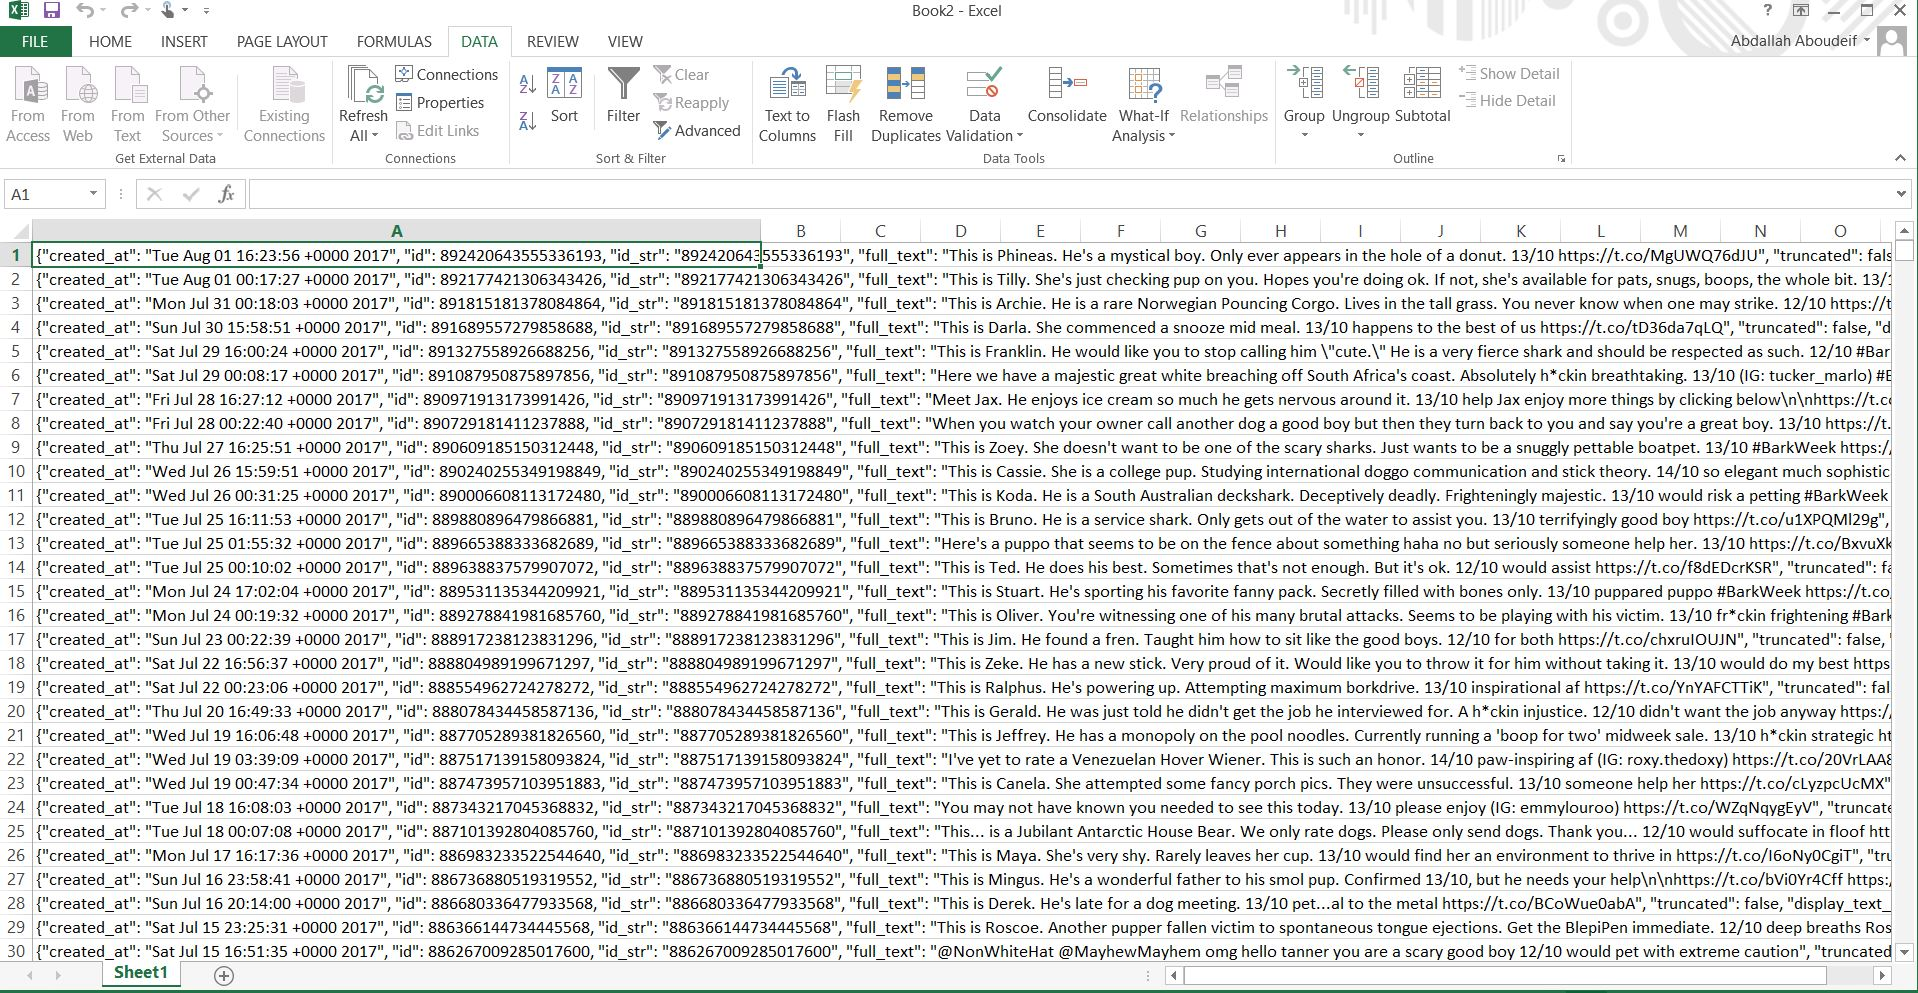

In [297]:
api_df.sample(5)

tweet_id  retweet_count  favorite_count
2030  671763349865160704            999            1788
1449  695794761660297217            880            3490
55    881536004380872706          16570           50199
2287  667174963120574464             88             262
373   828372645993398273           3344           13756

### 2- Programmatic assessment:
###### - twitter-archive-enhanced file

In [298]:
# show twitter archive head
archive_df.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

In [299]:
# check image twitter archive and data types
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [300]:
# check if there are duplicated values in tweet_id
archive_df.tweet_id.duplicated().values.sum()

0

In [301]:
# check if there are retweets
sum(archive_df.retweeted_status_id.isnull() == False)

181

In [302]:
# check if there are replies
sum(archive_df.in_reply_to_status_id.isnull() == False)

78

In [303]:
# chaking the rating denominator values which should be 10 for all tweets
sum(archive_df.rating_denominator.value_counts() != 10)

18

In [304]:
# chaking the rating numerator values which should be > 10 for all tweets
sum(archive_df.rating_numerator.value_counts() <= 10)

28

In [305]:
# chaking the rating numerator values > 15 to find outliers 
archive_df[archive_df.rating_numerator > 15].rating_numerator.value_counts()

420     2
75      2
60      1
27      1
99      1
165     1
80      1
144     1
44      1
204     1
45      1
88      1
143     1
1776    1
17      1
50      1
26      1
84      1
182     1
20      1
24      1
121     1
666     1
960     1
Name: rating_numerator, dtype: int64

In [306]:
# check values of doggo in dog stages columns
archive_df.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [307]:
# check values of floofer in dog stages columns
archive_df.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [308]:
# check values of pupper in dog stages columns
archive_df.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [309]:
# check values of puppo in dog stages columns
archive_df.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [310]:
# check if there are tweets in twitter archive dataframe doesn't have image in image predictions dataframe
archive_df.tweet_id.nunique()-predictions_df.tweet_id.nunique()

281

###### - image-predictions file

In [311]:
#show image predictions head
predictions_df.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

In [312]:
# check image predictions columns and data types
predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [313]:
# check columns duplications
predictions_df.duplicated().sum()

0

In [314]:
# check if there are tweets in predictions_df with no image
predictions_df.jpg_url.isnull().sum()

0

In [315]:
# find tweets doesn't have a validate dog picture
invalid_pic = predictions_df.query("p1_dog != True").query("p2_dog != True").query("p3_dog != True" )
invalid_pic

tweet_id                                            jpg_url  \
6     666051853826850816    https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
17    666104133288665088    https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg   
18    666268910803644416    https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg   
21    666293911632134144    https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg   
25    666362758909284353    https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg   
...                  ...                                                ...   
2021  880935762899988482    https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg   
2022  881268444196462592    https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg   
2046  886680336477933568    https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg   
2052  887517139158093824  https://pbs.twimg.com/ext_tw_video_thumb/88751...   
2074  892420643555336193    https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num                p1   p1_conf  p1_dog               p2   p2_conf  \
6           1        box_turtle  0.933012   False       mud_turtle  0.045885   
17          1               hen  0.965932   False             cock  0.033919   
18          1  desktop_computer  0.086502   False             desk  0.085547   
21          1  three-toed_sloth  0.914671   False            otter  0.015250   
25          1        guinea_pig  0.996496   False            skunk  0.002402   
...       ...               ...       ...     ...              ...       ...   
2021        1       street_sign  0.251801   False         umbrella  0.115123   
2022        1            tusker  0.473303   False  Indian_elephant  0.245646   
2046        1       convertible  0.738995   False       sports_car  0.139952   
2052        1         limousine  0.130432   False        tow_truck  0.029175   
2074        1            orange  0.097049   False            bagel  0.085851   

      p2_dog              p3   p3_conf  p3_dog  
6      False        terrapin  0.017885   False  
17     False       partridge  0.000052   False  
18     False        bookcase  0.079480   False  
21     False  great_grey_owl  0.013207   False  
25     False         hamster  0.000461   False  
...      ...             ...       ...     ...  
2021   False   traffic_light  0.069534   False  
2022   False            ibex  0.055661   False  
2046   False       car_wheel  0.044173   False  
2052   False   shopping_cart  0.026321   False  
2074   False          banana  0.076110   False  

[324 rows x 12 columns]

In [316]:
# show image to ensure that it is not a dog picture
Image(url=invalid_pic.jpg_url[6])

In [317]:
# another example
Image(url=invalid_pic.jpg_url[25])

###### - tweet-json file

In [318]:
# show tweet-json head
api_df.head()

tweet_id  retweet_count  favorite_count
0  892420643555336193           8853           39467
1  892177421306343426           6514           33819
2  891815181378084864           4328           25461
3  891689557279858688           8964           42908
4  891327558926688256           9774           41048

In [319]:
# cheak tweet-json columns and data types and null values
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


## Quality issues:

#### 1- Data type of timestamp column in archive dataframe is a string and it should be in datetime type
#### 2- Data type of tweet_id columns in all dataframes are a integer while it should be in string type since we don't need to make calculations on it
#### 3- invalid values in the source column in the archive_df dataframe which has HTML tags 
#### 4- In twitter archive dataframe there are 18 rating in rating_denominator column doesn't have the value 10 and it should be 10
#### 5-There are 28 value in rating_numerator column  (in twitter archive dataframe) that have a value <= 10 while it should be greater than 10 
#### 6- There are 181 retweets in twitter archive dataframe
#### 7- There are 324 rows of tweets in image predictions dataframe doesn't have a validate dog picture
#### 8- There are 78 replies in twitter archive dataframe 
#### 9- There are tweets in twitter archive dataframe doesn't exists in picture predictions dataframe

## Tidy issues:
#### A- Twitter archive, twitter API and image predictions dataframes are single observational unit but it's stored in multiple tables
#### B- In the archive_df dataframe, the dog stage feature is represented by 4 columns 
* doggo
* floofer
* pupper
* puppo
#### while each observation should forms one row


# Cleaning Data

In [320]:
#copy dataframes
clean_archive_df = archive_df.copy()
clean_predictions_df = predictions_df.copy()
clean_api_df = api_df.copy()

##### Define

1- Convert data type of timestamp column in archive dataframe to datetime using astype function

##### Code

In [321]:
clean_archive_df.timestamp = clean_archive_df.timestamp.astype('datetime64[ns]')

##### Test

In [322]:
clean_archive_df.timestamp.dtype

dtype('<M8[ns]')

##### Define

2- Convert data type of tweet_id columns in all dataframes to string using astype function

##### Code

In [323]:
clean_archive_df.tweet_id = clean_archive_df.tweet_id.astype('str')
clean_predictions_df.tweet_id = clean_predictions_df.tweet_id.astype('str')
clean_api_df.tweet_id = clean_api_df.tweet_id.astype('str')

##### Test

In [324]:
print(clean_archive_df.tweet_id.dtype)
print(clean_predictions_df.tweet_id.dtype)
print(clean_api_df.tweet_id.dtype)

object
object
object


##### Define

3- Delete the HTML tags from source column using replace function

##### Code

In [325]:
# remove HTML tags from source column
clean_archive_df.source = clean_archive_df.source.str.replace(r'<(?:a\b[^>]*>|/a>)', '')


##### Test

In [326]:
clean_archive_df.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

            timestamp              source  \
0 2017-08-01 16:23:56  Twitter for iPhone   
1 2017-08-01 00:17:27  Twitter for iPhone   
2 2017-07-31 00:18:03  Twitter for iPhone   
3 2017-07-30 15:58:51  Twitter for iPhone   
4 2017-07-29 16:00:24  Twitter for iPhone   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

##### Define

4- Write 10 in all rating_denominator column values using assignment

##### Code

In [327]:
clean_archive_df['rating_denominator'] = 10

##### Test

In [328]:
clean_archive_df['rating_denominator'].value_counts()

10    2356
Name: rating_denominator, dtype: int64

##### Define

5- Delete rows that have a value <= 10 in rating_numerator column using Dataframe Selection

##### Code

In [329]:
clean_archive_df = clean_archive_df[clean_archive_df['rating_numerator'] > 10]

##### Test

In [330]:
clean_archive_df['rating_numerator'].value_counts()

12      558
11      464
13      351
14       54
15        2
75        2
420       2
165       1
44        1
666       1
204       1
182       1
17        1
20        1
24        1
26        1
27        1
45        1
144       1
50        1
60        1
960       1
80        1
84        1
88        1
99        1
121       1
143       1
1776      1
Name: rating_numerator, dtype: int64

##### Define

6- Delete all retweets in twitter archive dataframe using Dataframe Selection

##### Code

In [331]:
clean_archive_df = clean_archive_df[clean_archive_df.retweeted_status_id.isnull()]

##### Test

In [332]:
clean_archive_df.retweeted_status_id.value_counts()

Series([], Name: retweeted_status_id, dtype: int64)

##### Define

7- Delete 324 rows from image predictions dataframe that doesn't have a validate dog picture using panda's .drop() function

##### Code

In [333]:
clean_predictions_df = clean_predictions_df.drop(invalid_pic.index,axis=0)

##### Test

In [334]:
clean_predictions_df.query("p1_dog != True").query("p2_dog != True").query("p3_dog != True" )

Empty DataFrame
Columns: [tweet_id, jpg_url, img_num, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog]
Index: []

##### Define

8- Delete all replies rows from twitter archive dataframe using Dataframe Selection

##### Code

In [335]:
clean_archive_df = clean_archive_df[clean_archive_df.in_reply_to_status_id.isnull() == True]

##### Test

In [336]:
clean_archive_df.in_reply_to_status_id.value_counts()

Series([], Name: in_reply_to_status_id, dtype: int64)

##### Define

A-1- Delete useless columns from twitter archive and image predictions dataframes using DataFrame slicing

##### Code

In [337]:
clean_archive_df=clean_archive_df.iloc[:,np.r_[0,3:6,9:17]]
clean_predictions_df=clean_predictions_df.iloc[:,0:2]

##### Test

In [338]:
clean_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1242 entries, 0 to 2339
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1242 non-null   object        
 1   timestamp           1242 non-null   datetime64[ns]
 2   source              1242 non-null   object        
 3   text                1242 non-null   object        
 4   expanded_urls       1241 non-null   object        
 5   rating_numerator    1242 non-null   int64         
 6   rating_denominator  1242 non-null   int64         
 7   name                1242 non-null   object        
 8   doggo               1242 non-null   object        
 9   floofer             1242 non-null   object        
 10  pupper              1242 non-null   object        
 11  puppo               1242 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 126.1+ KB


In [339]:
clean_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tweet_id  1751 non-null   object
 1   jpg_url   1751 non-null   object
dtypes: object(2)
memory usage: 41.0+ KB


##### Define

A-2- Merging image predictions, twitter archive and twitter API into master dataframe using panda's .merge() function

##### Code (1)

In [340]:
# merging image predictions dataframe and twitter archive dataframe into master dataframe
master_df = pd.merge(clean_archive_df, clean_predictions_df, how = 'left', on = ['tweet_id'])

##### Test (1)

In [341]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1242 entries, 0 to 1241
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1242 non-null   object        
 1   timestamp           1242 non-null   datetime64[ns]
 2   source              1242 non-null   object        
 3   text                1242 non-null   object        
 4   expanded_urls       1241 non-null   object        
 5   rating_numerator    1242 non-null   int64         
 6   rating_denominator  1242 non-null   int64         
 7   name                1242 non-null   object        
 8   doggo               1242 non-null   object        
 9   floofer             1242 non-null   object        
 10  pupper              1242 non-null   object        
 11  puppo               1242 non-null   object        
 12  jpg_url             1030 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(10)
memor

##### Code (2)

In [342]:
# merging twitter API dataframe with master dataframe
master_df = pd.merge(master_df, clean_api_df, how = 'left', on = ['tweet_id'])

##### Test (2)

In [343]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1242 entries, 0 to 1241
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1242 non-null   object        
 1   timestamp           1242 non-null   datetime64[ns]
 2   source              1242 non-null   object        
 3   text                1242 non-null   object        
 4   expanded_urls       1241 non-null   object        
 5   rating_numerator    1242 non-null   int64         
 6   rating_denominator  1242 non-null   int64         
 7   name                1242 non-null   object        
 8   doggo               1242 non-null   object        
 9   floofer             1242 non-null   object        
 10  pupper              1242 non-null   object        
 11  puppo               1242 non-null   object        
 12  jpg_url             1030 non-null   object        
 13  retweet_count       1242 non-null   int64       

In [344]:
master_df.shape

(1242, 15)

##### Define

9- Delete all tweets in master dataframe doesn't have a picture using DataFrame selection 

##### Code

In [345]:
master_df = master_df[master_df.jpg_url.isnull() == False]

##### Test

In [346]:
master_df.jpg_url.isnull().sum()

0

In [347]:
master_df.sample(10)

tweet_id           timestamp              source  \
938   696886256886657024 2016-02-09 02:40:05  Twitter for iPhone   
415   805520635690676224 2016-12-04 21:14:20  Twitter for iPhone   
606   767500508068192258 2016-08-21 23:15:55  Twitter for iPhone   
725   743222593470234624 2016-06-15 23:24:09  Twitter for iPhone   
719   744334592493166593 2016-06-19 01:02:50  Twitter for iPhone   
666   753294487569522689 2016-07-13 18:26:16  Twitter for iPhone   
1138  674038233588723717 2015-12-08 01:30:12  Twitter for iPhone   
671   752173152931807232 2016-07-10 16:10:29  Twitter for iPhone   
283   828408677031882754 2017-02-06 01:03:14  Twitter for iPhone   
465   793962221541933056 2016-11-02 23:45:19  Twitter for iPhone   

                                                   text  \
938   Guys I found the dog from Up. 12/10 https://t....   
415   This is Zeke the Wonder Dog. He never let that...   
606   This is Louie. He's making quite a h*ckin mess...   
725   This is a very rare Great Alaskan Bush Pupper....   
719   This is Blanket. She has overthrown her human....   
666   This is Ace. He's a window washer. One of the ...   
1138  This is Kaiya. She's an aspiring shoe model. 1...   
671   This is Brody. He's a lifeguard. Always prepar...   
283   This is Bear. He went outside to play in the s...   
465   This is Maximus. His face is stuck like that. ...   

                                          expanded_urls  rating_numerator  \
938   https://twitter.com/dog_rates/status/696886256...                12   
415   https://twitter.com/dog_rates/status/805520635...                13   
606   https://twitter.com/dog_rates/status/767500508...                12   
725   https://twitter.com/dog_rates/status/743222593...                12   
719   https://twitter.com/dog_rates/status/744334592...                11   
666   https://twitter.com/dog_rates/status/753294487...                11   
1138  https://twitter.com/dog_rates/status/674038233...                12   
671   https://twitter.com/dog_rates/status/752173152...                12   
283   https://twitter.com/dog_rates/status/828408677...                12   
465   https://twitter.com/dog_rates/status/793962221...                12   

      rating_denominator     name doggo floofer  pupper puppo  \
938                   10     None  None    None    None  None   
415                   10     Zeke  None    None    None  None   
606                   10    Louie  None    None    None  None   
725                   10        a  None    None  pupper  None   
719                   10  Blanket  None    None    None  None   
666                   10      Ace  None    None    None  None   
1138                  10    Kaiya  None    None  pupper  None   
671                   10    Brody  None    None    None  None   
283                   10     Bear  None    None    None  None   
465                   10  Maximus  None    None    None  None   

                                              jpg_url  retweet_count  \
938   https://pbs.twimg.com/media/CavWWdFWAAArflW.jpg           2016   
415   https://pbs.twimg.com/media/Cy3IvdZXgAUoEaj.jpg           1905   
606   https://pbs.twimg.com/media/Cqa1ofnXEAAG0yn.jpg           2688   
725   https://pbs.twimg.com/media/ClB09z0WYAAA1jz.jpg           2164   
719   https://pbs.twimg.com/media/ClRoXGwWIAEVVzc.jpg           2412   
666   https://pbs.twimg.com/media/CnQ9Vq1WEAEYP01.jpg           1191   
1138  https://pbs.twimg.com/media/CVqqMtiVEAEye_L.jpg            456   
671   https://pbs.twimg.com/media/CnBBfNuWcAAkOgO.jpg           2106   
283   https://pbs.twimg.com/media/C38ZSzlWIAEpQzs.jpg           1477   
465   https://pbs.twimg.com/media/CwS4aqZXUAAe3IO.jpg           5711   

      favorite_count  
938             5317  
415             6368  
606             8295  
725             6792  
719             7443  
666             3758  
1138            1176  
671             6569  
283             8398  
465            18910

##### Define

B- Representethe dog stage feature in one column instade of 4 by:

1- remove 'None' in [doggo-floofer-pupper-puppo] columns using .str.replace('None' , '') function

2- creating dog_stage column

3- fill it by values of 4 columns if exist using assignment

4- remove the unneeded four columns using panda's .drop() function

##### Code

In [348]:
# remove 'None' in [doggo-floofer-pupper-puppo] columns
dog_stage = ['doggo','floofer', 'pupper', 'puppo']
for i in dog_stage:
    master_df[i] = master_df[i].str.replace('None' , '')

In [349]:
# add dog_stage column to master dataframe with the values of [doggo-floofer-pupper-puppo] columns
master_df['dog_stage'] = ""
for i in dog_stage:
    for o in master_df[i].index:
        if master_df[i][o] != '' :
            master_df['dog_stage'][o] += '{}/'.format(master_df[i][o])

<ipython-input-349-3274fcb7ec6b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master_df['dog_stage'][o] += '{}/'.format(master_df[i][o])


In [350]:
# remove unneeded '-' character from 'dog_stage' column
for i in master_df.dog_stage.index:
    master_df['dog_stage'][i] = master_df['dog_stage'][i][:-1]

<ipython-input-350-7291e3d565b3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master_df['dog_stage'][i] = master_df['dog_stage'][i][:-1]


In [351]:
# remove useless columns [doggo-floofer-pupper-puppo]
master_df.drop(dog_stage,axis=1,inplace=True)

##### Test

In [352]:
master_df.dog_stage.unique()

array(['', 'doggo', 'puppo', 'pupper', 'floofer', 'doggo/puppo',
       'doggo/floofer', 'doggo/pupper'], dtype=object)

In [353]:
master_df.sample(10)

tweet_id           timestamp              source  \
952   693262851218264065 2016-01-30 02:41:58  Twitter for iPhone   
406   807621403335917568 2016-12-10 16:22:02  Twitter for iPhone   
26    886736880519319552 2017-07-16 23:58:41  Twitter for iPhone   
1107  675820929667219457 2015-12-12 23:34:00  Twitter for iPhone   
117   865359393868664832 2017-05-19 00:12:11  Twitter for iPhone   
947   694001791655137281 2016-02-01 03:38:15  Twitter for iPhone   
493   790337589677002753 2016-10-23 23:42:19  Twitter for iPhone   
529   783821107061198850 2016-10-06 00:08:09  Twitter for iPhone   
874   706516534877929472 2016-03-06 16:27:23  Twitter for iPhone   
300   826204788643753985 2017-01-30 23:05:46  Twitter for iPhone   

                                                   text  \
952   I hope you guys enjoy this beautiful snowy pup...   
406   This is Ollie Vue. He was a 3 legged pupper on...   
26    This is Mingus. He's a wonderful father to his...   
1107  Here's a handful of sleepy puppers. All look u...   
117   This is Sammy. Her tongue ejects without warni...   
947   This is Chester. He's a Benefloof Cumberbark. ...   
493   Meet Maggie. She can hear your cells divide. 1...   
529   This is Mairi. She has mastered the art of cam...   
874   Please enjoy this pup in a cooler. Permanently...   
300   Here's a little more info on Dew, your favorit...   

                                          expanded_urls  rating_numerator  \
952   https://twitter.com/dog_rates/status/693262851...                11   
406   https://twitter.com/dog_rates/status/807621403...                14   
26    https://www.gofundme.com/mingusneedsus,https:/...                13   
1107  https://twitter.com/dog_rates/status/675820929...                11   
117   https://twitter.com/dog_rates/status/865359393...                13   
947   https://twitter.com/dog_rates/status/694001791...                11   
493   https://twitter.com/dog_rates/status/790337589...                12   
529   https://twitter.com/dog_rates/status/783821107...                12   
874   https://twitter.com/dog_rates/status/706516534...                12   
300   http://us.blastingnews.com/news/2017/01/kentuc...                13   

      rating_denominator     name  \
952                   10     None   
406                   10    Ollie   
26                    10   Mingus   
1107                  10     None   
117                   10    Sammy   
947                   10  Chester   
493                   10   Maggie   
529                   10    Mairi   
874                   10     None   
300                   10     None   

                                              jpg_url  retweet_count  \
952   https://pbs.twimg.com/media/CZ724fDUYAAytS-.jpg            568   
406   https://pbs.twimg.com/media/CzU_YVGUUAA3Xsd.jpg           4288   
26    https://pbs.twimg.com/media/DE5Se8FXcAAJFx4.jpg           3443   
1107  https://pbs.twimg.com/media/CWD_jQMWEAAdYwH.jpg            260   
117   https://pbs.twimg.com/media/DAJfxqGVoAAnvQt.jpg           5384   
947   https://pbs.twimg.com/media/CaGW8JQUMAEVtLl.jpg           1176   
493   https://pbs.twimg.com/media/CvfX2AnWYAAQTay.jpg           2167   
529   https://pbs.twimg.com/media/CuCxIzyWEAQTnQA.jpg           2269   
874   https://pbs.twimg.com/media/Cc4NCQiXEAEx2eJ.jpg           1150   
300   https://pbs.twimg.com/media/C3dEza1WcAAhlNU.jpg           1075   

      favorite_count dog_stage  
952             2459    pupper  
406            16236    pupper  
26             12306            
1107            1140            
117            27530            
947             3705            
493             8740            
529             8209            
874             3404            
300             5361     doggo

## Storing Data

In [354]:
# saving master dataframe into csv file
master_df.to_csv('twitter_archive_master.csv',index=False)

# Analyzing and visualizing Data

In [355]:
df = pd.read_csv('twitter_archive_master.csv')
df.head(5)

tweet_id            timestamp              source  \
0  892177421306343426  2017-08-01 00:17:27  Twitter for iPhone   
1  891815181378084864  2017-07-31 00:18:03  Twitter for iPhone   
2  891689557279858688  2017-07-30 15:58:51  Twitter for iPhone   
3  891327558926688256  2017-07-29 16:00:24  Twitter for iPhone   
4  891087950875897856  2017-07-29 00:08:17  Twitter for iPhone   

                                                text  \
0  This is Tilly. She's just checking pup on you....   
1  This is Archie. He is a rare Norwegian Pouncin...   
2  This is Darla. She commenced a snooze mid meal...   
3  This is Franklin. He would like you to stop ca...   
4  Here we have a majestic great white breaching ...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892177421...                13   
1  https://twitter.com/dog_rates/status/891815181...                12   
2  https://twitter.com/dog_rates/status/891689557...                13   
3  https://twitter.com/dog_rates/status/891327558...                12   
4  https://twitter.com/dog_rates/status/891087950...                13   

   rating_denominator      name  \
0                  10     Tilly   
1                  10    Archie   
2                  10     Darla   
3                  10  Franklin   
4                  10      None   

                                           jpg_url  retweet_count  \
0  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg           6514   
1  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg           4328   
2  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg           8964   
3  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg           9774   
4  https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg           3261   

   favorite_count dog_stage  
0           33819       NaN  
1           25461       NaN  
2           42908       NaN  
3           41048       NaN  
4           20562       NaN

## How the most favourite tweet is looks like ?

In [356]:
df.favorite_count.max()

132810

In [357]:
max_f = df.query('favorite_count == 132810')
max_f

tweet_id            timestamp              source  \
271  822872901745569793  2017-01-21 18:26:02  Twitter for iPhone   

                                                  text  \
271  Here's a super supportive puppo participating ...   

                                         expanded_urls  rating_numerator  \
271  https://twitter.com/dog_rates/status/822872901...                13   

     rating_denominator  name  \
271                  10  None   

                                             jpg_url  retweet_count  \
271  https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg          48265   

     favorite_count dog_stage  
271          132810     puppo

In [358]:
Image(url=max_f.jpg_url[271])

In [359]:
max_f.text[271]

"Here's a super supportive puppo participating in the Toronto  #WomensMarch today. 13/10 https://t.co/nTz3FtorBc"

## How the less favourite tweet is looks like ?

In [360]:
df.favorite_count.min()

81

In [361]:
min_f = df.query('favorite_count == 81')
min_f

tweet_id            timestamp              source  \
1029  666102155909144576  2015-11-16 03:55:04  Twitter for iPhone   

                                                   text  \
1029  Oh my. Here you are seeing an Adobe Setter giv...   

                                          expanded_urls  rating_numerator  \
1029  https://twitter.com/dog_rates/status/666102155...                11   

      rating_denominator  name  \
1029                  10  None   

                                              jpg_url  retweet_count  \
1029  https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg             16   

      favorite_count dog_stage  
1029              81       NaN

In [362]:
Image(url=min_f.jpg_url[1029])

In [363]:
min_f.text[1029]

'Oh my. Here you are seeing an Adobe Setter giving birth to twins!!! The world is an amazing place. 11/10 https://t.co/11LvqN4WLq'

## What is the most favourite dog stage ?

In [364]:
df.groupby('dog_stage')['favorite_count'].sum()

dog_stage
doggo            1008829
doggo/floofer      17169
doggo/pupper       92175
doggo/puppo        47844
floofer            88427
pupper           1046605
puppo             429989
Name: favorite_count, dtype: int64

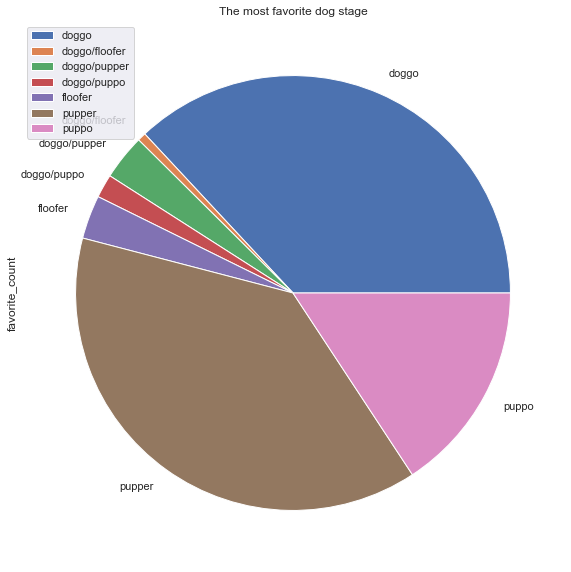

In [365]:

df.groupby('dog_stage')['favorite_count'].sum().plot(kind='pie',
                                                     title='The most favorite dog stage',
                                                     legend=True,
                                                     
                                                     figsize=(15,10));

## What is the most rating dog stage ?

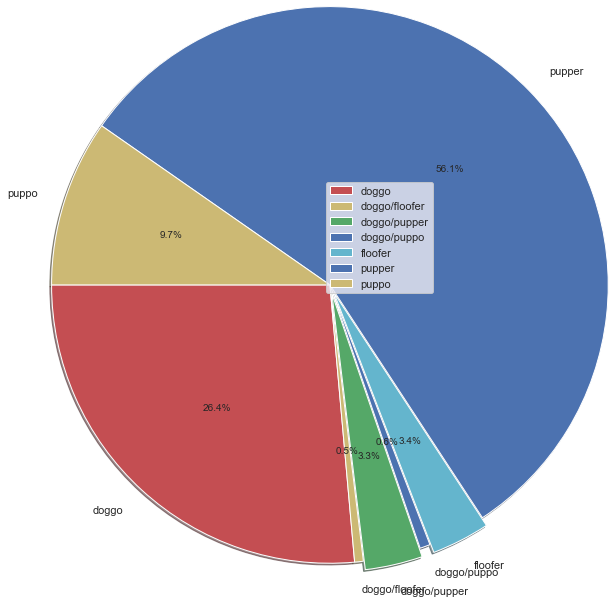

In [366]:
group = df.groupby('dog_stage')['rating_numerator'].sum() 
labels = list(group.index)
slices = list(group.values)
  
# color for each label 
colors = ['r', 'y', 'g', 'b','c','b','y'] 
  
# plotting the pie chart 
plt.pie(slices, labels = labels, colors=colors,  
        startangle=180, shadow = True, explode = (0, 0, 0.1, 0,0.1,0,0), 
        radius = 3.2, autopct = '%1.1f%%') 
  
# plotting legend 
plt.legend() 
  
# showing the plot 
plt.show()

### Now, let's analyze tweets time

In [367]:
# split timestamp column to day and month/year colmns
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['day'] = df.timestamp.dt.day
df['month'] = df.timestamp.dt.month.astype('str')+'/'+df.timestamp.dt.year.astype('str')


## How the tweets time flow is looks like ?

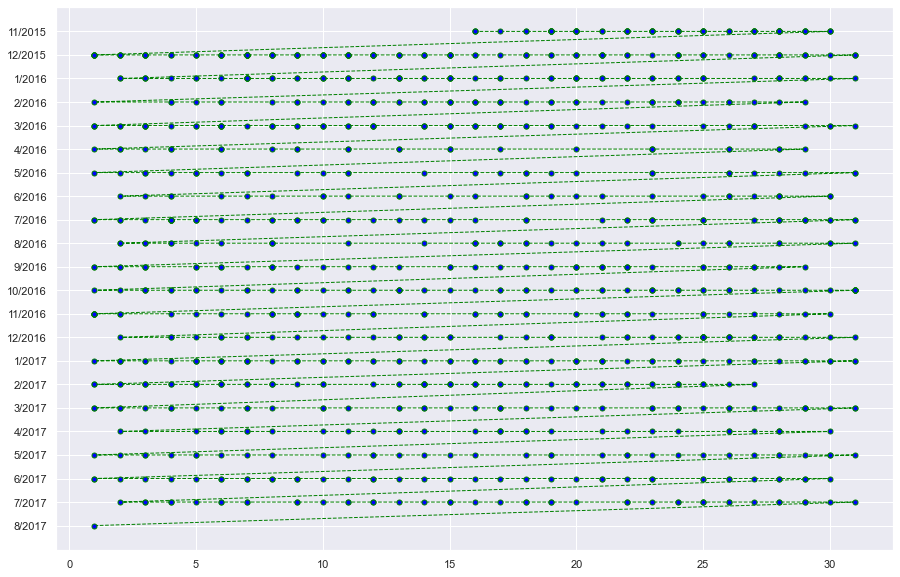

In [368]:
plt.figure(figsize=(15,10))
plt.plot(df.day, df.month, color='green', linestyle='dashed', linewidth = 1, 
         marker='.', markerfacecolor='blue', markersize=10);

## Which month have the most number of high rating tweets ?

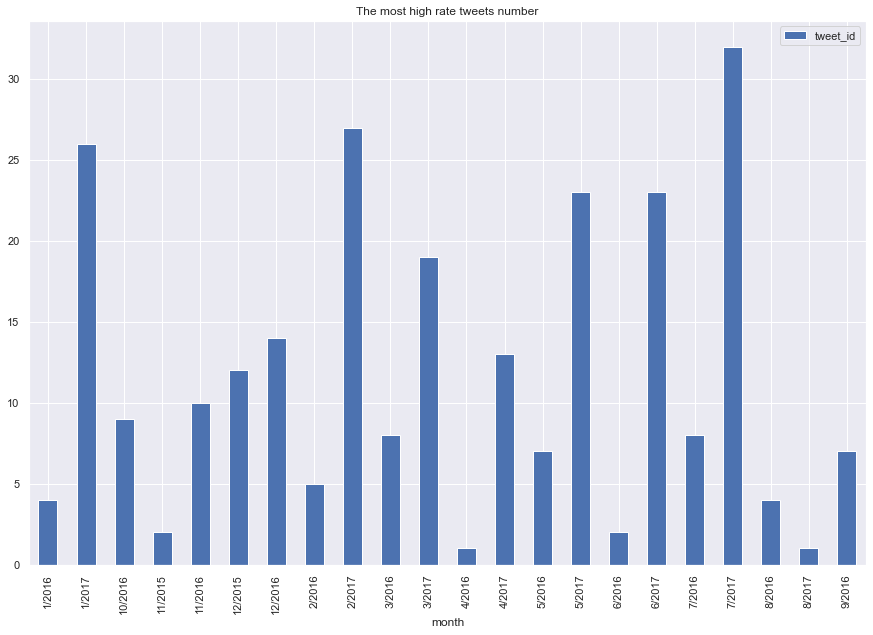

In [369]:
most_rate = df.query('rating_numerator > 12').groupby('month')['tweet_id'].count()
plt.figure(figsize=(15,10))
most_rate.plot(kind='bar',title='The most high rate tweets number',legend=True);

## Exploring tweets have hash tag in its text 

In [370]:
hash_tag = df[df['text'].str.contains("#")]
hash_tag['text'].count()

19

In [371]:
hash_tag['text']

3      This is Franklin. He would like you to stop ca...
4      Here we have a majestic great white breaching ...
7      This is Zoey. She doesn't want to be one of th...
9      This is Koda. He is a South Australian decksha...
13     This is Stuart. He's sporting his favorite fan...
14     This is Oliver. You're witnessing one of his m...
55     This is Snoopy. He's a proud #PrideMonthPuppo....
71     This is Sebastian. He can't see all the colors...
75     Here are my favorite #dogsatpollingstations \n...
76     This is Monkey. She's supporting owners everyw...
80     Say hello to Lassie. She's celebrating #PrideM...
131    Here's a puppo participating in the #ScienceMa...
179    Here we have some incredible doggos for #K9Vet...
227    I couldn't make it to the #WKCDogShow BUT I ha...
265    Retweet the h*ck out of this 13/10 pupper #Bel...
271    Here's a super supportive puppo participating ...
595    This is Huxley. He's pumped for #BarkWeek. Eve...
675    This is Bluebert. He jus

### let's see it

In [372]:
h_tag = []
for i in hash_tag['text'].values:
    x1 = i[:].find('#')
    x2 = i[x1:].find(' ')+1
    x3 = i[x1:x1+x2]
    h_tag.append(x3[:-1])
h_tag

['#BarkWeek',
 '#BarkWeek',
 '#BarkWeek',
 '#BarkWeek',
 '#BarkWeek',
 '#BarkWeek',
 '#PrideMonthPuppo.',
 '#PrideMonth',
 '#dogsatpollingstations',
 '#PrideMonth',
 '#PrideMonth',
 '#ScienceMarch.',
 '#K9VeteransDay.',
 '#WKCDogShow',
 '#BellLetsTalk',
 '#WomensMarch',
 '#BarkWeek.',
 '#FinalFur',
 '#notallpuppers']